In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [19]:
calculated_time = pd.read_csv('Wyznaczone_czasy_Tz_Tp.csv', sep=";")
registration_tz = pd.read_csv('Tz_rejestracji.csv', sep=";")
registration_tp = pd.read_csv('Tp_rejestracji.csv', sep=";")

In [20]:
calculated_df = pd.DataFrame(data=calculated_time)
calculated_df

,Tz0 [ms],Tz1 [ms],Tz2 [ms],Tz3 [ms],Tz4 [ms],Tz5 [ms],Tz6 [ms],Tz7 [ms],Tp0 [ms],Tp1 [ms],Tp2 [ms],Tp3 [ms],Tp4 [ms],Tp5 [ms],Tp6 [ms]
0,71,170,97,57,181,116,192,174,108,83,59,110,57,128,117


In [21]:
calculated_df.rename(columns=lambda x: x.replace('[ms]', '').strip(), inplace=True)

In [22]:
calculated_Tz = calculated_df[['Tz0','Tz1','Tz2', 'Tz3', 'Tz4', 'Tz5', 'Tz6', 'Tz7']]
calculated_Tp = calculated_df[['Tp0', 'Tp1', 'Tp2', 'Tp3', 'Tp4', 'Tp5', 'Tp6']]

In [23]:
registration_tp

,Tp0 [ms],Tp1 [ms],Tp2 [ms],Tp3 [ms],Tp4 [ms],Tp5 [ms],Tp6 [ms],Unnamed: 7,Unnamed: 8
0,80,128,33,105,25,57,96,NaN,NaN
1,136,191,48,96,25,113,103,NaN,NaN
2,153,201,40,105,49,105,105,NaN,NaN
3,177,217,25,113,24,113,113,NaN,NaN
4,121,9,65,113,57,96,105,NaN,NaN
5,129,25,57,113,49,97,96,NaN,NaN
6,89,153,57,128,73,153,121,NaN,NaN
7,89,9,49,113,49,105,105,NaN,NaN
8,129,177,49,153,33,129,112,NaN,NaN
9,137,193,49,105,41,113,105,NaN,NaN


In [24]:
registration_tz

,Tz0 [ms],Tz1 [ms],Tz2 [ms],Tz3 [ms],Tz4 [ms],Tz5 [ms],Tz6 [ms],Tz7 [ms],Unnamed: 8,Unnamed: 9
0,72,151,64,64,168,112,137,167,NaN,NaN
1,64,208,87,56,168,80,185,175,NaN,NaN
2,63,216,72,56,168,104,176,176,NaN,NaN
3,87,240,64,48,177,79,168,152,NaN,NaN
4,55,192,88,56,176,120,168,160,NaN,NaN
5,71,200,88,48,184,112,168,160,NaN,NaN
6,71,160,80,56,184,88,216,185,NaN,NaN
7,72,160,80,56,184,120,168,144,NaN,NaN
8,80,192,104,32,208,88,192,176,NaN,NaN
9,55,200,80,64,168,96,176,152,NaN,NaN


In [25]:
unnamed_cols_tz = [col for col in registration_tz.columns if col.startswith('Unnamed')]
unnamed_cols_tz

['Unnamed: 8', 'Unnamed: 9']

In [26]:
unnamed_cols_tp = [col for col in registration_tp.columns if col.startswith('Unnamed')]
unnamed_cols_tp

['Unnamed: 7', 'Unnamed: 8']

In [27]:
registration_tz_filtered = registration_tz[registration_tz[unnamed_cols_tz].isna().all(axis=1)]
registration_tp_filtered = registration_tp[registration_tp[unnamed_cols_tp].isna().all(axis=1)]

In [28]:
registration_tz_filtered

,Tz0 [ms],Tz1 [ms],Tz2 [ms],Tz3 [ms],Tz4 [ms],Tz5 [ms],Tz6 [ms],Tz7 [ms],Unnamed: 8,Unnamed: 9
0,72,151,64,64,168,112,137,167,NaN,NaN
1,64,208,87,56,168,80,185,175,NaN,NaN
2,63,216,72,56,168,104,176,176,NaN,NaN
3,87,240,64,48,177,79,168,152,NaN,NaN
4,55,192,88,56,176,120,168,160,NaN,NaN
5,71,200,88,48,184,112,168,160,NaN,NaN
6,71,160,80,56,184,88,216,185,NaN,NaN
7,72,160,80,56,184,120,168,144,NaN,NaN
8,80,192,104,32,208,88,192,176,NaN,NaN
9,55,200,80,64,168,96,176,152,NaN,NaN


In [29]:
registration_tp_filtered

,Tp0 [ms],Tp1 [ms],Tp2 [ms],Tp3 [ms],Tp4 [ms],Tp5 [ms],Tp6 [ms],Unnamed: 7,Unnamed: 8
0,80,128,33,105,25,57,96,NaN,NaN
1,136,191,48,96,25,113,103,NaN,NaN
2,153,201,40,105,49,105,105,NaN,NaN
3,177,217,25,113,24,113,113,NaN,NaN
4,121,9,65,113,57,96,105,NaN,NaN
5,129,25,57,113,49,97,96,NaN,NaN
6,89,153,57,128,73,153,121,NaN,NaN
7,89,9,49,113,49,105,105,NaN,NaN
8,129,177,49,153,33,129,112,NaN,NaN
9,137,193,49,105,41,113,105,NaN,NaN


In [30]:
registration_tz_filtered = registration_tz_filtered.drop(columns=['Unnamed: 8', 'Unnamed: 9'])
registration_tp_filtered = registration_tp_filtered.drop(columns=['Unnamed: 7', 'Unnamed: 8'])

In [31]:
registration_tp_filtered

,Tp0 [ms],Tp1 [ms],Tp2 [ms],Tp3 [ms],Tp4 [ms],Tp5 [ms],Tp6 [ms]
0,80,128,33,105,25,57,96
1,136,191,48,96,25,113,103
2,153,201,40,105,49,105,105
3,177,217,25,113,24,113,113
4,121,9,65,113,57,96,105
5,129,25,57,113,49,97,96
6,89,153,57,128,73,153,121
7,89,9,49,113,49,105,105
8,129,177,49,153,33,129,112
9,137,193,49,105,41,113,105


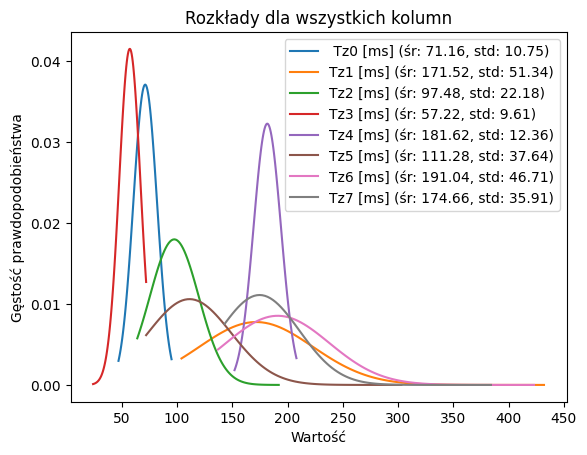

In [32]:
plt.figure()
for column in registration_tz_filtered.columns:
    mean = registration_tz_filtered[column].mean()
    std = registration_tz_filtered[column].std()
    x = np.linspace(min(registration_tz_filtered[column]), max(registration_tz_filtered[column]), 100)
    y = norm.pdf(x, mean, std)

    plt.plot(x, y, label=f'{column} (śr: {mean:.2f}, std: {std:.2f})')

plt.title('Rozkłady dla wszystkich kolumn')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.show()

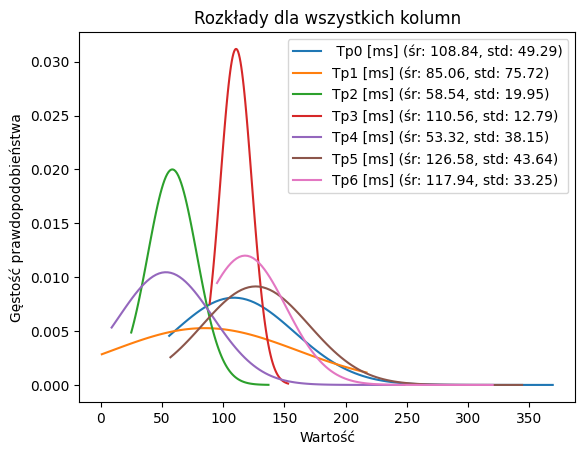

In [33]:
plt.figure()
for column in registration_tp_filtered.columns:
    mean = registration_tp_filtered[column].mean()
    std = registration_tp_filtered[column].std()
    x = np.linspace(min(registration_tp_filtered[column]), max(registration_tp_filtered[column]), 100)
    y = norm.pdf(x, mean, std)

    plt.plot(x, y, label=f'{column} (śr: {mean:.2f}, std: {std:.2f})')

plt.title('Rozkłady dla wszystkich kolumn')
plt.xlabel('Wartość')
plt.ylabel('Gęstość prawdopodobieństwa')
plt.legend()
plt.show()

array([[<Axes: title={'center': ' Tp0 [ms]'}>,
        <Axes: title={'center': 'Tp1 [ms]'}>,
        <Axes: title={'center': 'Tp2 [ms]'}>],
       [<Axes: title={'center': 'Tp3 [ms]'}>,
        <Axes: title={'center': 'Tp4 [ms]'}>,
        <Axes: title={'center': 'Tp5 [ms]'}>],
       [<Axes: title={'center': 'Tp6 [ms]'}>, <Axes: >, <Axes: >]],
      dtype=object)

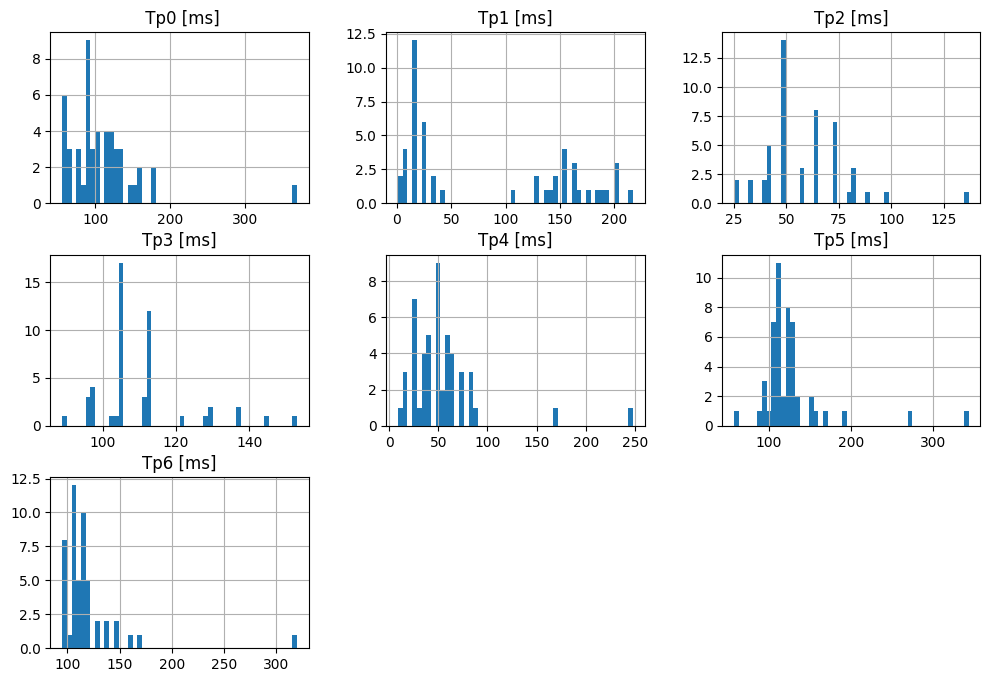

In [34]:
registration_tp_filtered.hist(bins=50, figsize=(12,8))

array([[<Axes: title={'center': ' Tz0 [ms]'}>,
        <Axes: title={'center': 'Tz1 [ms]'}>,
        <Axes: title={'center': 'Tz2 [ms]'}>],
       [<Axes: title={'center': 'Tz3 [ms]'}>,
        <Axes: title={'center': 'Tz4 [ms]'}>,
        <Axes: title={'center': 'Tz5 [ms]'}>],
       [<Axes: title={'center': 'Tz6 [ms]'}>,
        <Axes: title={'center': 'Tz7 [ms]'}>, <Axes: >]], dtype=object)

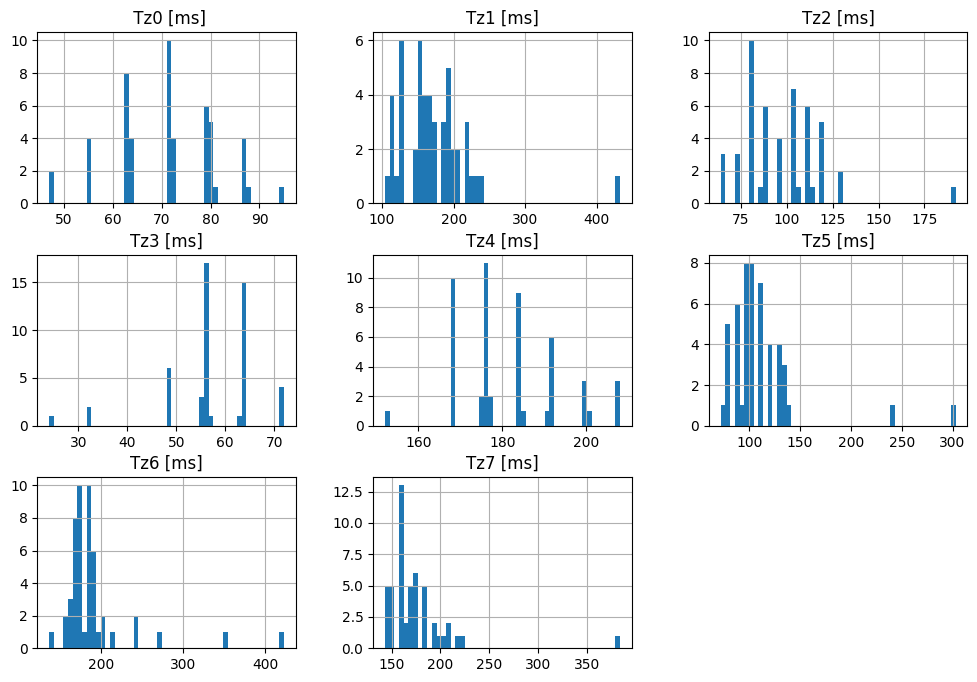

In [35]:
registration_tz_filtered.hist(bins=50, figsize=(12,8))

In [36]:
filtered_tp = registration_tp_filtered

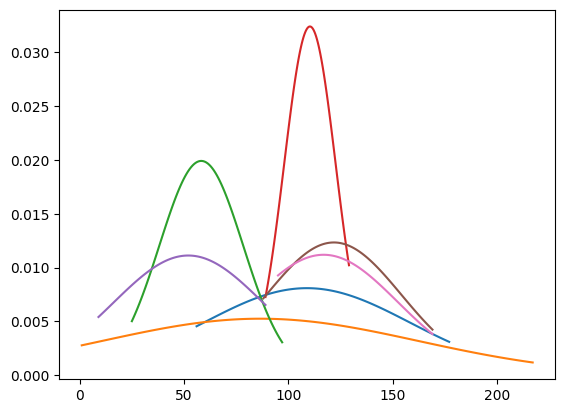

In [37]:
for column in filtered_tp.columns:
    mean_tp = filtered_tp[column].mean()
    std_tp = filtered_tp[column].std()
    
    threshold = 2 * std_tp

    filtered_tp = filtered_tp[(filtered_tp[column] >= mean_tp - threshold) & (filtered_tp[column] <= mean_tp + threshold)]
    x = np.linspace(min(filtered_tp[column]), max(filtered_tp[column]), 100)
    y = norm.pdf(x, mean_tp, std_tp)
    
    # filtered_tz.hist(bins=50, figsize=(12,8))
    plt.plot(x, y, label=f'{column} (śr: {mean_tp:.2f}, std: {std_tp:.2f})')


array([[<Axes: title={'center': ' Tp0 [ms]'}>,
        <Axes: title={'center': 'Tp1 [ms]'}>,
        <Axes: title={'center': 'Tp2 [ms]'}>],
       [<Axes: title={'center': 'Tp3 [ms]'}>,
        <Axes: title={'center': 'Tp4 [ms]'}>,
        <Axes: title={'center': 'Tp5 [ms]'}>],
       [<Axes: title={'center': 'Tp6 [ms]'}>, <Axes: >, <Axes: >]],
      dtype=object)

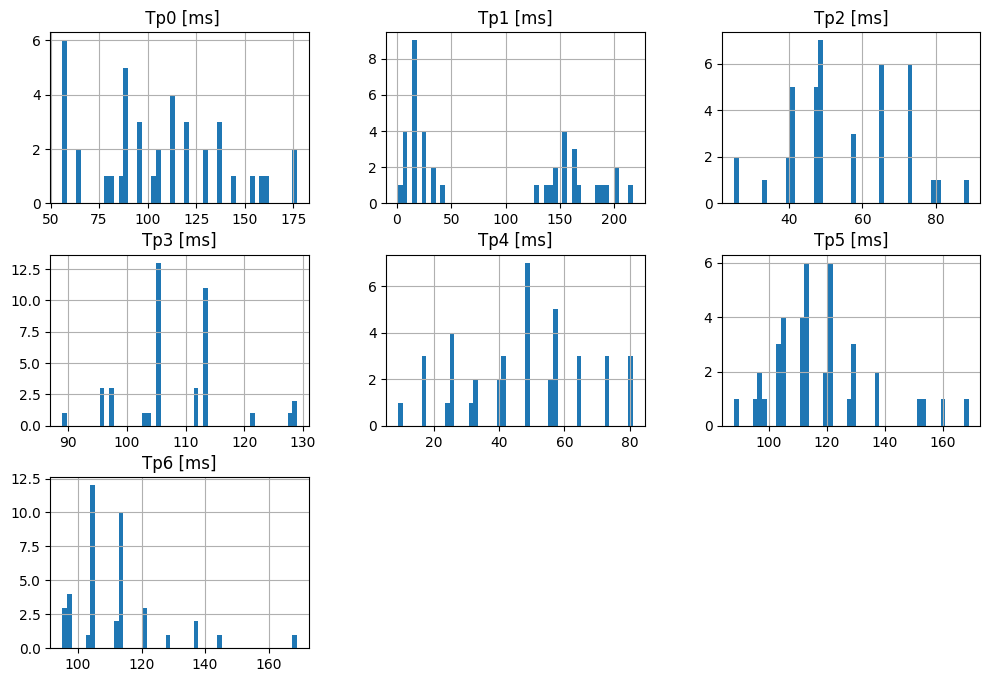

In [38]:
    filtered_tp.hist(bins=50,figsize=(12,8))

In [39]:
filtered_tz = registration_tz_filtered

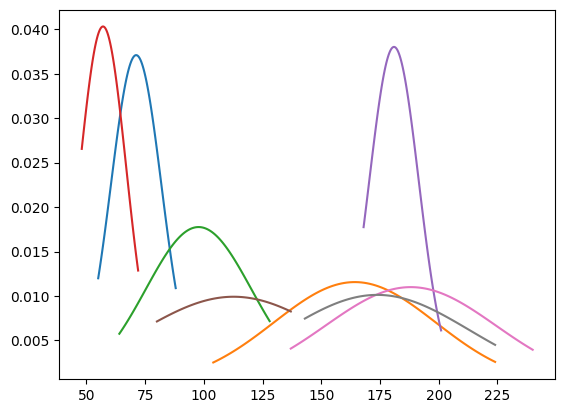

In [40]:
for column in filtered_tz.columns:
    mean_tz = filtered_tz[column].mean()
    std_tz = filtered_tz[column].std()
    
    threshold = 2 * std_tz

    filtered_tz = filtered_tz[(filtered_tz[column] >= mean_tz - threshold) & (filtered_tz[column] <= mean_tz + threshold)]
    x = np.linspace(min(filtered_tz[column]), max(filtered_tz[column]), 100)
    y = norm.pdf(x, mean_tz, std_tz)
    
    # filtered_tz.hist(bins=50, figsize=(12,8))
    plt.plot(x, y, label=f'{column} (śr: {mean_tz:.2f}, std: {std_tz:.2f})')

In [41]:
filtered_tp

,Tp0 [ms],Tp1 [ms],Tp2 [ms],Tp3 [ms],Tp4 [ms],Tp5 [ms],Tp6 [ms]
1,136,191,48,96,25,113,103
2,153,201,40,105,49,105,105
3,177,217,25,113,24,113,113
4,121,9,65,113,57,96,105
5,129,25,57,113,49,97,96
6,89,153,57,128,73,153,121
7,89,9,49,113,49,105,105
9,137,193,49,105,41,113,105
10,177,17,49,105,73,121,121
12,113,153,48,105,49,121,112


array([[<Axes: title={'center': ' Tz0 [ms]'}>,
        <Axes: title={'center': 'Tz1 [ms]'}>,
        <Axes: title={'center': 'Tz2 [ms]'}>],
       [<Axes: title={'center': 'Tz3 [ms]'}>,
        <Axes: title={'center': 'Tz4 [ms]'}>,
        <Axes: title={'center': 'Tz5 [ms]'}>],
       [<Axes: title={'center': 'Tz6 [ms]'}>,
        <Axes: title={'center': 'Tz7 [ms]'}>, <Axes: >]], dtype=object)

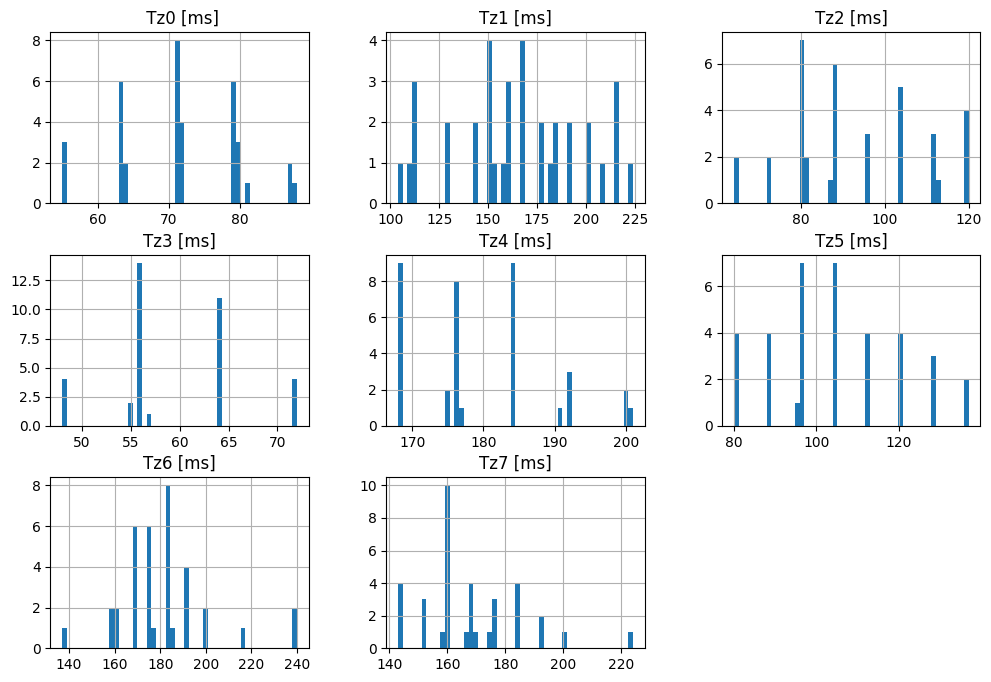

In [42]:
filtered_tz.hist(bins=50, figsize=(12,8))

In [43]:
filtered_tz

,Tz0 [ms],Tz1 [ms],Tz2 [ms],Tz3 [ms],Tz4 [ms],Tz5 [ms],Tz6 [ms],Tz7 [ms]
0,72,151,64,64,168,112,137,167
1,64,208,87,56,168,80,185,175
2,63,216,72,56,168,104,176,176
4,55,192,88,56,176,120,168,160
5,71,200,88,48,184,112,168,160
6,71,160,80,56,184,88,216,185
7,72,160,80,56,184,120,168,144
9,55,200,80,64,168,96,176,152
12,71,176,80,48,184,96,184,176
14,79,104,112,56,184,128,200,201


In [44]:
registration_tp_filtered.agg(['mean', 'std'])

,Tp0 [ms],Tp1 [ms],Tp2 [ms],Tp3 [ms],Tp4 [ms],Tp5 [ms],Tp6 [ms]
mean,108.840000,85.060000,58.540000,110.560000,53.3200,126.580000,117.94000
std,49.285656,75.717361,19.945037,12.792153,38.1455,43.642841,33.24701


In [64]:
filtered_tp.agg(['mean', 'std'])

,Tp0 [ms],Tp1 [ms],Tp2 [ms],Tp3 [ms],Tp4 [ms],Tp5 [ms],Tp6 [ms]
mean,105.500000,88.5250,55.000000,108.150000,47.050000,118.05000,111.77500
std,34.291361,76.4588,15.378973,8.896989,19.341665,17.68521,14.77435


In [46]:
registration_tz_filtered.agg(['mean', 'std'])

,Tz0 [ms],Tz1 [ms],Tz2 [ms],Tz3 [ms],Tz4 [ms],Tz5 [ms],Tz6 [ms],Tz7 [ms]
mean,71.160000,171.520000,97.480000,57.220000,181.620000,111.280000,191.040000,174.660000
std,10.752048,51.342484,22.180374,9.607161,12.358406,37.636305,46.707059,35.914644


In [47]:
avg = registration_tp_filtered.mean()

In [58]:
test = (registration_tp_filtered - avg) / 1000

In [61]:
test.sum(axis=1)

0    -0.13684
1     0.05116
2     0.09716
3     0.12116
4    -0.09484
5    -0.09484
6     0.11316
7    -0.14184
8     0.12116
9     0.08216
10    0.00216
11    0.23216
12    0.04016
13    0.12016
14   -0.02284
15    0.06416
16    0.09816
17   -0.02284
18    0.09616
19   -0.17484
20   -0.05684
21    0.08816
22   -0.08984
23   -0.10184
24   -0.12084
25   -0.13584
26   -0.06384
27    0.12116
29    0.05416
30    0.03416
31    0.07916
32    0.31116
33    0.06516
34   -0.07084
35   -0.01684
36   -0.05384
37   -0.16384
38    0.04816
39   -0.08084
40    0.07216
41    0.01016
42   -0.15284
43   -0.17384
44   -0.03284
45   -0.13484
46   -0.02484
47   -0.02984
48    0.06816
49   -0.05384
50    0.05616
dtype: float64